In [3]:
import random
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils as vutils

In [4]:
from DCGAN_models import Generator, Discriminator

In [5]:
netG = Generator(0).to('cpu')
netD = Discriminator(0).to('cpu')

In [6]:
models = torch.load('./models/DCGAN')

netG.load_state_dict(models['Generator_net'])
netD.load_state_dict(models['discriminator_net'])

<All keys matched successfully>

In [7]:
netG.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [36]:
def generatorFakeImages(num_images):
    input = torch.randn(num_images, 100, 1, 1, device='cpu')
    output = netG(input).detach().cpu()
    fig = plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title('Fake Images')
    plt.imshow(np.transpose(vutils.make_grid(output, padding=2, normalize=True),(1,2,0)), animated=True)

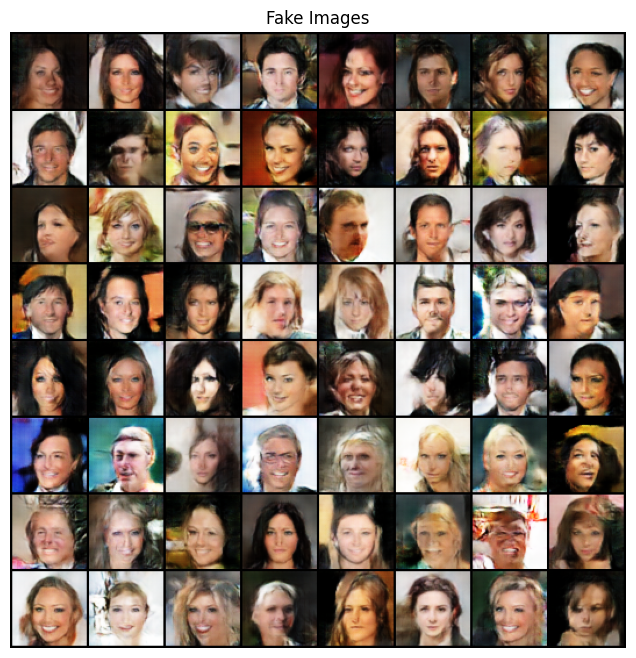

In [37]:
generatorFakeImages(64)